# Armijo backtracking linesearch

In [1]:
import numpy as np
def GD(fp, x_init, learningrate):
    x = x_init
    gvec = fp(x)
    assert(gvec.shape() == x.shape())
    while np.linalg.norm(gvec) > 0.001:
        x -= learning_rate* gvec
        gvec = fp(x)
    
    return x

def GD_backtrack(f, fp, x_init, c, tau, max_alpha, callback = None):
    x = np.copy(x_init)
    gvec = fp(x) 

    assert(gvec.shape == x.shape)
    assert tau < 1
    assert c < 1

    GD_count = 0
    BT_count = 0
    while np.linalg.norm(gvec) > 0.001: # stopping criteria
        if callback:
            callback(x)
        # Armijo backtracking line search
        m = - np.linalg.norm(gvec)
        p = gvec / m
        alpha = max_alpha
        t = -c*m
        while f(x + alpha * p) > f(x) -alpha * t:
            alpha *= tau # backtrack
            BT_count += 1
        x += alpha * p
        gvec = fp(x)
        GD_count += 1
        
    
    return x, GD_count, BT_count

In [2]:
def loadvariable(i):
    varA = 'A' + str(i+1)
    varb = 'b' +str(i+1)
    A = spio.loadmat(os.path.join('Q1Data',varA + '.mat'))
    A = A[varA]
    b = spio.loadmat(os.path.join('Q1Data', varb + '.mat'))
    b = b[varb].ravel()
    return A, b

## a) Write down the gradient

In [6]:
def L1approx(A,b, ee, x):
    return np.sum(np.sqrt(np.power(np.dot(A,x)-b,2)+ee*ee))

def L1p_approx(A,b,ee,x):
    factor = np.power(np.power(np.dot(A,x)-b,2)+ee*ee,-0.5) * (np.dot(A,x) - b)
    return np.sum((A.T*factor).T, axis=0)

def L1norm(A, b, x):
    return np.sum(np.abs(np.dot(A,x) - b))

In [7]:
import numpy as np
import scipy.io as spio
import os
import scipy.optimize as spopt
import pandas as pd
import time
A, b = loadvariable(0)
L1p_approx(A,b,0.01,np.zeros(16))

array([ 0.20823924, -1.65616022, -1.77590993,  0.12638759,  0.76879033,
        0.24709754, -0.07502289, -0.15019738,  2.07865156, -0.58873936,
        0.79825869,  0.65255492, -1.58439937,  1.15523771,  0.33574734,
       -0.38227237])

## b) Apply gradient descent with backtracking linesearch

In [9]:
import numpy as np
import scipy.io as spio
import os
import scipy.optimize as spopt
import pandas as pd
import time
# Initialise storage variables
GDresults = {}
GDresults['L1approx'] = []
GDresults['time'] = []
GDresults['GDiters'] = []
GDresults['BTiters'] = []
GDresults['L1'] = []

for i in range(4):
    A, b = loadvariable(i)
    print ('Now solving ' +  str(i))
    
    f = lambda x : L1approx(A, b, 0.01, x)
    fp = lambda x : L1p_approx(A, b, 0.01, x)
    
    
    x_init = np.zeros(A.shape[1])
    c = 0.5
    tau = 0.8
    max_alpha = 1
    
    start_time = time.time()
    xopt, GD_count, BT_count = GD_backtrack(f, fp, x_init, c, tau, max_alpha)
    
    GDresults['time'].append(time.time() - start_time)
    GDresults['L1approx'].append(f(xopt))
    GDresults['GDiters'].append(GD_count)
    GDresults['BTiters'].append(BT_count)
    GDresults['L1'].append(L1norm(A,b,xopt))

Now solving 0
Now solving 1
Now solving 2
Now solving 3


In [5]:
indices = ['(A1,b1)', '(A2,b2)', '(A3,b3)', '(A4,b4)']
    
c1 = pd.Series(GDresults['L1approx'], index=indices)
c2 = pd.Series(GDresults['GDiters'], index=indices)
c3 = pd.Series(GDresults['BTiters'], index=indices)
c4 = pd.Series(GDresults['time'], index=indices)
c5 = pd.Series(GDresults['L1'], index=indices)

df = pd.DataFrame({'min L1approx norm': c1, 'L1 runtime': c4, 'True L1 norm' : c5, 'GD iters' : c2, 'BT iters' : c3})

print(df)

         BT iters  GD iters  L1 runtime  True L1 norm  min L1approx norm
(A1,b1)      2737       121    0.078153      8.238060           8.357671
(A2,b2)     15388       536    0.657141     33.507546          33.890727
(A3,b3)     19749       689    6.996798    146.852760         148.464414
(A4,b4)     15368       544   22.462256    277.896802         281.122218


## (c) Nonlinear Conjugate Gradient

In [6]:
import scipy.optimize as spopt

CGresults = {}
CGresults['L1approx']= []
CGresults['time'] = []
CGresults['L1'] = []

for i in range(4):
    A, b = loadvariable(i)
    print ('Now solving ' +  str(i))
    
    f = lambda x : L1approx(A, b, 0.01, x)
    fp = lambda x : L1p_approx(A, b, 0.01, x)
    
    
    x_init = np.zeros(A.shape[1])
    
    start_time = time.time()
    xopt, fopt, func_calls, grad_calls, warn_flag = spopt.fmin_cg(f, x_init, fprime=fp, gtol=1e-3, full_output=1)
    
    CGresults['time'].append(time.time() - start_time)
    CGresults['L1approx'].append(f(xopt))
    CGresults['L1'].append(L1norm(A,b,xopt))

Now solving 0
Optimization terminated successfully.
         Current function value: 8.357671
         Iterations: 60
         Function evaluations: 108
         Gradient evaluations: 108
Now solving 1
Optimization terminated successfully.
         Current function value: 33.890739
         Iterations: 185
         Function evaluations: 274
         Gradient evaluations: 274
Now solving 2
Optimization terminated successfully.
         Current function value: 148.464428
         Iterations: 175
         Function evaluations: 265
         Gradient evaluations: 265
Now solving 3
Optimization terminated successfully.
         Current function value: 281.122268
         Iterations: 189
         Function evaluations: 271
         Gradient evaluations: 271


In [8]:
indices = ['(A1,b1)', '(A2,b2)', '(A3,b3)', '(A4,b4)']
    
c1 = pd.Series(CGresults['L1approx'], index=indices)
c4 = pd.Series(CGresults['time'], index=indices)
c5 = pd.Series(CGresults['L1'], index=indices)

df = pd.DataFrame({'min L1 norm': c1, 'L1 runtime': c4, 'True L1 norm' : c5})

print(df)

         L1 runtime  True L1 norm  min L1 norm
(A1,b1)    0.014742      8.238035     8.357671
(A2,b2)    0.054392     33.507853    33.890739
(A3,b3)    0.263980    146.853038   148.464428
(A4,b4)    1.085949    277.896568   281.122268


## (d) Newton Method

In [9]:
def L1h_approx(A,b,ee,x):
    n = x.size
    r = np.dot(A,x) - b
    factor1 = - np.power(np.power(r, 2) + ee**2, -1.5) * np.power(r, 2)
    factor2 = np.power(np.power(r, 2) + ee**2, -0.5)
    factor = factor1 + factor2
    res = np.einsum('i,ij,ik->jk', factor, A, A)
    return res

In [10]:
def hessian ( A, b, ee, x0, epsilon=1.e-5):
    """
    A numerical approximation to the Hessian matrix of cost function at
    location x0 (hopefully, the minimum)
    """
    # ``calculate_cost_function`` is the cost function implementation
    # The next line calculates an approximation to the first
    # derivative
    f1 = L1p_approx(A, b, ee, x0)

    # Allocate space for the hessian
    n = x0.size
    hessian = np.zeros ( ( n, n ) )
    # The next loop fill in the matrix
    xx = x0
    for j in xrange( n ):
        xx0 = xx[j] # Store old value
        xx[j] = xx0 + epsilon # Perturb with finite difference
        # Recalculate the partial derivatives for this new point
        f2 = L1p_approx(A, b, ee, xx) 
        hessian[:, j] = (f2 - f1)/epsilon # scale...
        xx[j] = xx0 # Restore initial value of x0        
    return hessian

The hessian formula is approximately correct!

In [11]:
def NewtonMethod(f, fp, fh, x_init, tau = 0.1, c = 0.5, callback = None):
    x = np.copy(x_init)
    gvec = fp(x)
    hess = fh(x)

    numiter = 0
    BT = 0

    while np.linalg.norm(gvec) > 0.001:
#     while numiter < 1000:
        try:
            y = np.linalg.solve(hess, gvec)
            # Backtracking line search
            while  c * np.dot(y, gvec) > f(x) - f(x-y):
                y = tau * y
                BT += 1
            x -=  y
        except np.linalg.LinAlgError:
            break
        gvec = fp(x)
        hess = fh(x)
        numiter += 1
        if callback:
            callback(x)
    
    return x, numiter, BT

In [12]:
NTresults = {}
NTresults['L1approx']= []
NTresults['time'] = []
NTresults['L1'] = []
NTresults['BTiters'] = []
NTresults['NTiters'] = []

A, b = loadvariable(1)

f = lambda x : L1approx(A, b, 0.01, x)
fp = lambda x : L1p_approx(A, b, 0.01, x)
fh = lambda x : L1h_approx(A, b, 0.01, x)

x_init = np.random.random(A.shape[1])
# x_init = xopt + np.random.random(A.shape[1])
# x_init = x_init0

start_time = time.time()
xopt, NTiter, BTiter = NewtonMethod(f, fp, fh, x_init, 1e-3)

NTresults['time'].append(time.time() - start_time)
NTresults['L1approx'].append(f(xopt))
NTresults['NTiters'].append(NTiter)
NTresults['BTiters'].append(BT_count)
NTresults['L1'].append(L1norm(A,b,xopt))

## errors vs iterations

In [13]:
class logger():
    def __init__(self, f):
        self.xs = []
        self.f = f
    def save(self, x):
            self.xs.append(self.f(x))

In [14]:
A, b = loadvariable(1)

In [20]:
f = lambda x : L1approx(A, b, 0.01, x)
fp = lambda x : L1p_approx(A, b, 0.01, x)
fh = lambda x : L1h_approx(A, b, 0.01, x)

GDlog = logger(f)
CGlog = logger(f)
NTlog = logger(f)

x_init = np.random.rand(A.shape[1])
c = 0.5
tau = 0.5
max_alpha = 1

xopt, fopt, func_calls, grad_calls, warn_flag = spopt.fmin_cg(f, x_init, fprime=fp, full_output=1, callback=CGlog.save)

xopt, CGiter, BTiter = NewtonMethod(f, fp, fh, x_init, tau=0.1, callback=NTlog.save)

xopt, GD_count, BT_count = GD_backtrack(f, fp, x_init, c, tau, max_alpha, callback = GDlog.save)

Optimization terminated successfully.
         Current function value: 33.890724
         Iterations: 344
         Function evaluations: 513
         Gradient evaluations: 513


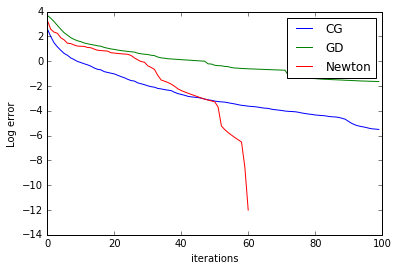

In [21]:
import matplotlib.pyplot as plt
CGerror = np.log(np.abs(CGlog.xs - CGlog.xs[-1]))
GDerror = np.log(np.abs(GDlog.xs - CGlog.xs[-1]))
NTerror = np.log(np.abs(NTlog.xs - NTlog.xs[-1]))
plt.plot(CGerror[:100], label = 'CG')
plt.plot(GDerror[:100], label = 'GD')
plt.plot(NTerror[:100], label = 'Newton')
plt.legend()
plt.xlabel('iterations')
plt.ylabel('Log error')
plt.show()

All three algorithms had the same random initialisation. After a single iteration, CG made the most improvement, followed by newton's method and finally GD. This ordering persisted until about 20 iterations, after which newton's method picked up a new rate of convergence and caught up with CG by iteration 50. After that it picked up an even faster rate of convergence and error plunged to zero by iteration 60.

In [23]:
A, b = loadvariable(0)
EPSresults = {}
EPSresults['GDiters'] = []
EPSresults['GDtime'] = []
EPSresults['GDL1approx'] = []
EPSresults['CGiters'] = []
EPSresults['CGtime'] = []
EPSresults['CGL1approx'] = []

for eps in np.linspace(np.log(1e-4),np.log(1e-1), 100):
    eps = np.exp(eps)
    f = lambda x : L1approx(A, b, eps, x)
    fp = lambda x : L1p_approx(A, b, eps, x)
    
    x_init = np.zeros(A.shape[1])
    c = 0.5
    tau = 0.8
    max_alpha = 1
    
    start_time = time.time()
    xopt, GD_count, BT_count = GD_backtrack(f, fp, x_init, c, tau, max_alpha)
    EPSresults['GDtime'].append(time.time() - start_time)
    EPSresults['GDiters'].append(GD_count)
    EPSresults['GDL1approx'].append(f(xopt))
    start_time = time.time()
    xopt, fopt, func_calls, grad_calls, warn_flag = spopt.fmin_cg(f, x_init, fprime=fp, gtol=1e-3, full_output=1)
    EPSresults['CGtime'].append(time.time() - start_time)
    EPSresults['CGiters'].append(func_calls)
    EPSresults['CGL1approx'].append(f(xopt))    

Optimization terminated successfully.
         Current function value: 8.212497
         Iterations: 678
         Function evaluations: 1093
         Gradient evaluations: 1093
Optimization terminated successfully.
         Current function value: 8.212586
         Iterations: 575
         Function evaluations: 942
         Gradient evaluations: 942
Optimization terminated successfully.
         Current function value: 8.212682
         Iterations: 462
         Function evaluations: 752
         Gradient evaluations: 752
Optimization terminated successfully.
         Current function value: 8.212785
         Iterations: 492
         Function evaluations: 801
         Gradient evaluations: 801
Optimization terminated successfully.
         Current function value: 8.212895
         Iterations: 462
         Function evaluations: 762
         Gradient evaluations: 762
Optimization terminated successfully.
         Current function value: 8.213014
         Iterations: 575
         Function 

Optimization terminated successfully.
         Current function value: 8.248225
         Iterations: 96
         Function evaluations: 152
         Gradient evaluations: 152
Optimization terminated successfully.
         Current function value: 8.251101
         Iterations: 85
         Function evaluations: 143
         Gradient evaluations: 143
Optimization terminated successfully.
         Current function value: 8.254216
         Iterations: 82
         Function evaluations: 137
         Gradient evaluations: 137
Optimization terminated successfully.
         Current function value: 8.257587
         Iterations: 85
         Function evaluations: 139
         Gradient evaluations: 139
Optimization terminated successfully.
         Current function value: 8.261237
         Iterations: 80
         Function evaluations: 137
         Gradient evaluations: 137
Optimization terminated successfully.
         Current function value: 8.265189
         Iterations: 69
         Function evaluati

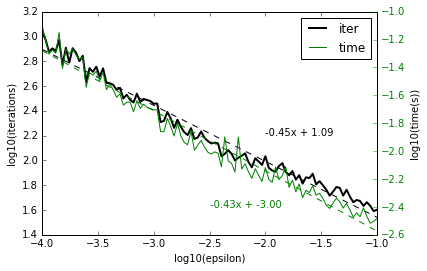

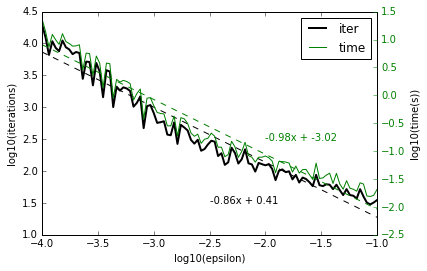

In [47]:
import matplotlib.pylab as plt

xlogspace = np.linspace(np.log10(1e-4),np.log10(1e-1), 100)

fig, ax1 = plt.subplots()
ln1 = ax1.plot(xlogspace,np.log10(EPSresults['CGiters']), label='iter', color='k', linewidth=2)
ax1.set_xlabel('log10(epsilon)')
ax1.set_ylabel('log10(iterations)')
ax1.tick_params('y', colors='k')

ax2 = ax1.twinx()
ln2 =ax2.plot(xlogspace,np.log10(EPSresults['CGtime']), label='time', color='g')
ax2.set_ylabel('log10(time(s))')
ax2.tick_params('y', colors='g')


# ax5 = ax2.twinx()
z = np.polyfit(xlogspace, np.copy(np.log10(EPSresults['CGiters'])),1 )
p = np.poly1d(z)
ax1.plot(xlogspace,p(xlogspace),"k--")
ax1.text(-2, 2.2, '{0:.2f}'.format(z[0]) + 'x + ' + '{0:.2f}'.format(z[1]))

z = np.polyfit(xlogspace, np.copy(np.log10(EPSresults['CGtime'])),1 )
p = np.poly1d(z)
ax2.plot(xlogspace,p(xlogspace),"g--")
ax2.text(-2.5, -2.4, '{0:.2f}'.format(z[0]) + 'x + ' + '{0:.2f}'.format(z[1]), color='g')

lns = ln1+ln2
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc=0)



plt.show()

fig, ax3 = plt.subplots()
ln3 = ax3.plot(xlogspace,np.log10(EPSresults['GDiters']), label='iter', color='k', linewidth=2)
ax3.set_xlabel('log10(epsilon)')
ax3.set_ylabel('log10(iterations)')
ax3.tick_params('y', colors='k')


ax4 = ax3.twinx()
ln4 = ax4.plot(xlogspace,np.log10(EPSresults['GDtime']), label='time', color='g')
ax4.set_ylabel('log10(time(s))')
ax4.tick_params('y', colors='g')

z = np.polyfit(xlogspace, np.copy(np.log10(EPSresults['GDiters'])),1 )
p = np.poly1d(z)
ax3.plot(xlogspace,p(xlogspace),"k--")
ax3.text(-2.5, 1.5, '{0:.2f}'.format(z[0]) + 'x + ' + '{0:.2f}'.format(z[1]))

z = np.polyfit(xlogspace, np.copy(np.log10(EPSresults['GDtime'])),1 )
p = np.poly1d(z)
ax4.plot(xlogspace,p(xlogspace),"g--")
ax4.text(-2, -0.8, '{0:.2f}'.format(z[0]) + 'x + ' + '{0:.2f}'.format(z[1]), color='g')

lns = ln3+ln4
labs = [l.get_label() for l in lns]
ax4.legend(lns, labs, loc=0)

plt.show()


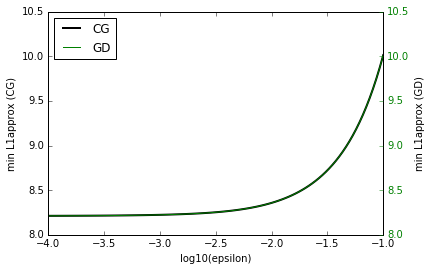

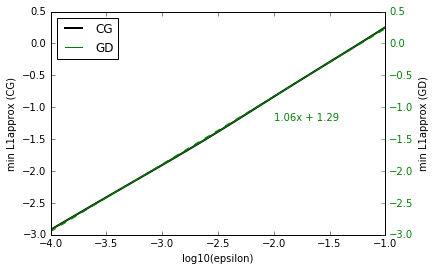

In [57]:
yCG = np.array(EPSresults['CGL1approx'])
yGD = np.array(EPSresults['GDL1approx'])
xlogspace = np.linspace(np.log10(1e-4),np.log10(1e-1), 100)

fig, ax1 = plt.subplots()
ln1 = ax1.plot(xlogspace, yCG, label='CG', color='k', linewidth=2)
ax1.set_xlabel('log10(epsilon)')
ax1.set_ylabel('min L1approx (CG)')
ax1.tick_params('y', colors='k')

ax2 = ax1.twinx()
ln2 =ax2.plot(xlogspace,yGD, label='GD', color='g')
ax2.set_ylabel('min L1approx (GD)')
ax2.tick_params('y', colors='g')

lns = ln1+ln2
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc=2)

plt.show()

fig, ax3 = plt.subplots()
ln3 = ax3.plot(xlogspace, np.log10(yCG - 8.2113), label='CG', color='k', linewidth=2)
ax3.set_xlabel('log10(epsilon)')
ax3.set_ylabel('min L1approx (CG)')
ax3.tick_params('y', colors='k')

ax4 = ax3.twinx()
ln4 =ax4.plot(xlogspace,np.log10(yGD - 8.2113), label='GD', color='g')
ax4.set_ylabel('min L1approx (GD)')
ax4.tick_params('y', colors='g')

z = np.polyfit(xlogspace, np.log10(yGD - 8.2113),1 )
p = np.poly1d(z)
ax4.plot(xlogspace,p(xlogspace),"g--")
ax4.text(-2, -1.2, '{0:.2f}'.format(z[0]) + 'x + ' + '{0:.2f}'.format(z[1]), color='g')

lns = ln3+ln4
labs = [l.get_label() for l in lns]
ax4.legend(lns, labs, loc=2)

plt.show()


Gradient Method's Scaling with N

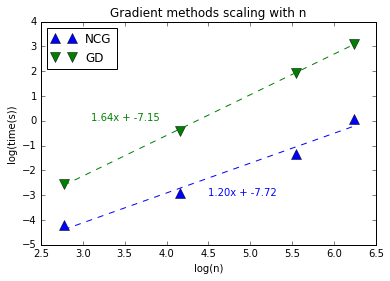

In [80]:
dim = np.array([16, 64, 256,512])
CGtime = np.array([0.014742,0.054392,0.26398,1.085949])
GDtime = np.array([0.078153,0.657141,6.996798,22.462256])

plt.plot(np.log(dim), np.log(CGtime), marker='^', linestyle='None', markersize=10, label = 'NCG', color = 'b')
plt.plot(np.log(dim), np.log(GDtime), marker='v', linestyle='None', markersize=10, label = 'GD', color = 'g')
plt.legend(loc=2)
plt.xlabel('log(n)')
plt.ylabel('log(time(s))')
plt.title('Gradient methods scaling with n')


z = np.polyfit(np.log(dim), np.log(CGtime),1 )
p = np.poly1d(z)
plt.plot(np.log(dim),p(np.log(dim)),"b--")
plt.text(4.5, -3, '{0:.2f}'.format(z[0]) + 'x + ' + '{0:.2f}'.format(z[1]), color='b')

z = np.polyfit(np.log(dim), np.log(GDtime),1 )
p = np.poly1d(z)
plt.plot(np.log(dim),p(np.log(dim)),"g--")
plt.text(3.1, 0, '{0:.2f}'.format(z[0]) + 'x + ' + '{0:.2f}'.format(z[1]), color='g')

plt.show()